# Presentation Quality Graphics in Python

One of the common complaints about visualization in Python, especially with the popular matplotlib package, is that the resulting output is not always visually appealing.  It is definitely possible to create high-quality graphics in Python, but it takes a little extra effort.

Let's start by importing several libraries that we'll need:

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

For this exercise, we'll be using a data set about diamonds, which includes data on cut, clarity, carats, and so on.

In [5]:
df = pd.read_csv('diamonds.csv')

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
df.shape

(53940, 11)

We can built a basic bar chart to show the number of diamonds by cut:

<AxesSubplot:>

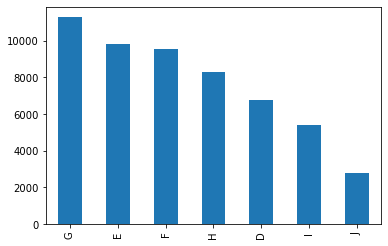

In [7]:
df['color'].value_counts().plot(kind='bar')

Not bad, but it could use some work.  If we build the chart in Seaborn, the default result looks a little better:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

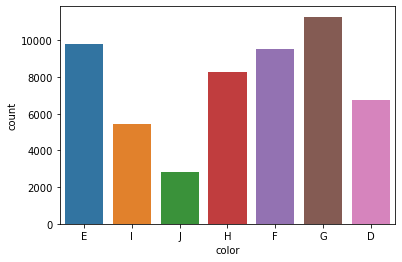

In [8]:
sns.countplot('color',data=df)

Say we're particularly interested in the cut with the highest count of diamonds.  By moving cut to the y axis, we can rotate the graph.  This helps to set up the next step, when we'll sort in descending order:

<AxesSubplot:xlabel='count', ylabel='color'>

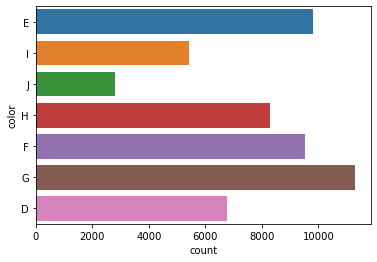

In [9]:
sns.countplot(y = 'color',data=df)

Now, to sort:

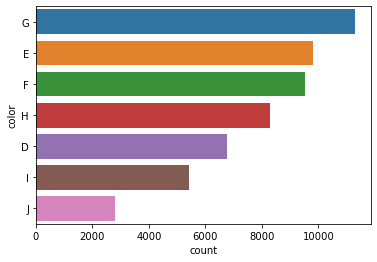

In [10]:
fig = sns.countplot(y = 'color',data=df, order = df['color'].value_counts().index)

Already looking better, isn't it?  Let's visit the colors for a minute.  The default color palette in Seaborn is nice, but it is pretty dark.  What other options exist?  Seaborn has several pre-built color palettes built from Color Brewer (colorbrewer2.org).  We can explore these different palettes below: 

In [11]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

Notice that we passed in the type of data we wish to color by, which determined what palettes were returned to us.  Once you find a palette you like, use 'set_palette' to assign that as our new color palette:

<AxesSubplot:xlabel='count', ylabel='color'>

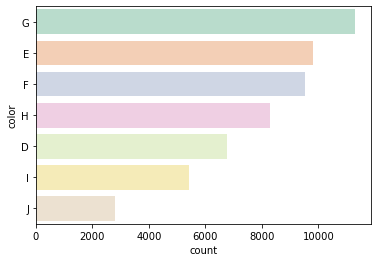

In [12]:
sns.set_palette('Pastel2')
sns.countplot(y = 'color',data=df, order = df['color'].value_counts().index)

Seaborn also includes several pre-built styles, which will configure a number of visual formatting properties for you.  The styles are:
 - darkgrid
 - whitegrid
 - dark
 - white
 - ticks
Experiment with different styles by using 'set_style' below:

<AxesSubplot:xlabel='count', ylabel='cut'>

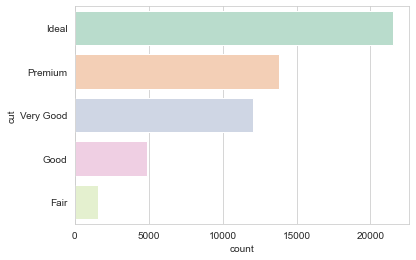

In [15]:
sns.set_style('whitegrid')
sns.countplot(y = 'cut',data=df, order = df['cut'].value_counts().index)

For legibility, let's add a thousands separator to our count axis:

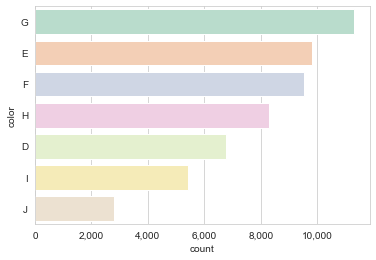

In [16]:
fig = sns.countplot(y = 'color',data=df, order = df['color'].value_counts().index)
fig.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))

Next, let's make the axis labels more descriptive:

[Text(0, 0.5, 'Color of Diamond'), Text(0.5, 0, 'Number of Diamonds')]

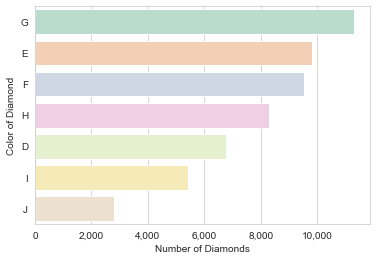

In [17]:
fig = sns.countplot(y = 'color',data=df, order = df['color'].value_counts().index)
fig.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))
fig.set(ylabel='Color of Diamond',xlabel='Number of Diamonds')

We can add text as a title and subtitle to make the chart's purpose more clear to the viewer.  Note that we manually determine where the text should appear by entering x and y coordinates:

Text(0.0, -0.65, 'What is the most popular color of diamond?')

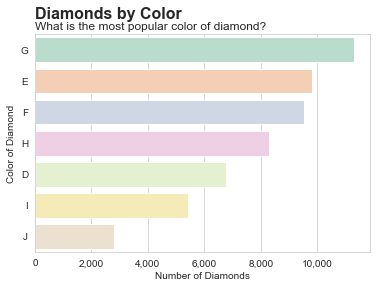

In [18]:
fig = sns.countplot(y = 'color',data=df, order = df['color'].value_counts().index)
fig.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))
fig.set(ylabel='Color of Diamond',xlabel='Number of Diamonds')
plt.text(x=0.0,y=-1.0,s='Diamonds by Color',fontsize=16,weight='bold')
plt.text(x=0.0,y=-0.65,s='What is the most popular color of diamond?',fontsize=12)

This has come a long way from our original, default bar chart!  Taking a few extra minutes to clean up some formatting, changing the color, and improving our labels can make all the difference in making our visualization appealing to our viewers.